# **REVISED CODE with 1 data visualization added and pdf and image generated which shows the "GRAPH"**  -VED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
##Converting the Taxable income variable to bucketing. 
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [4]:
##Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [5]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

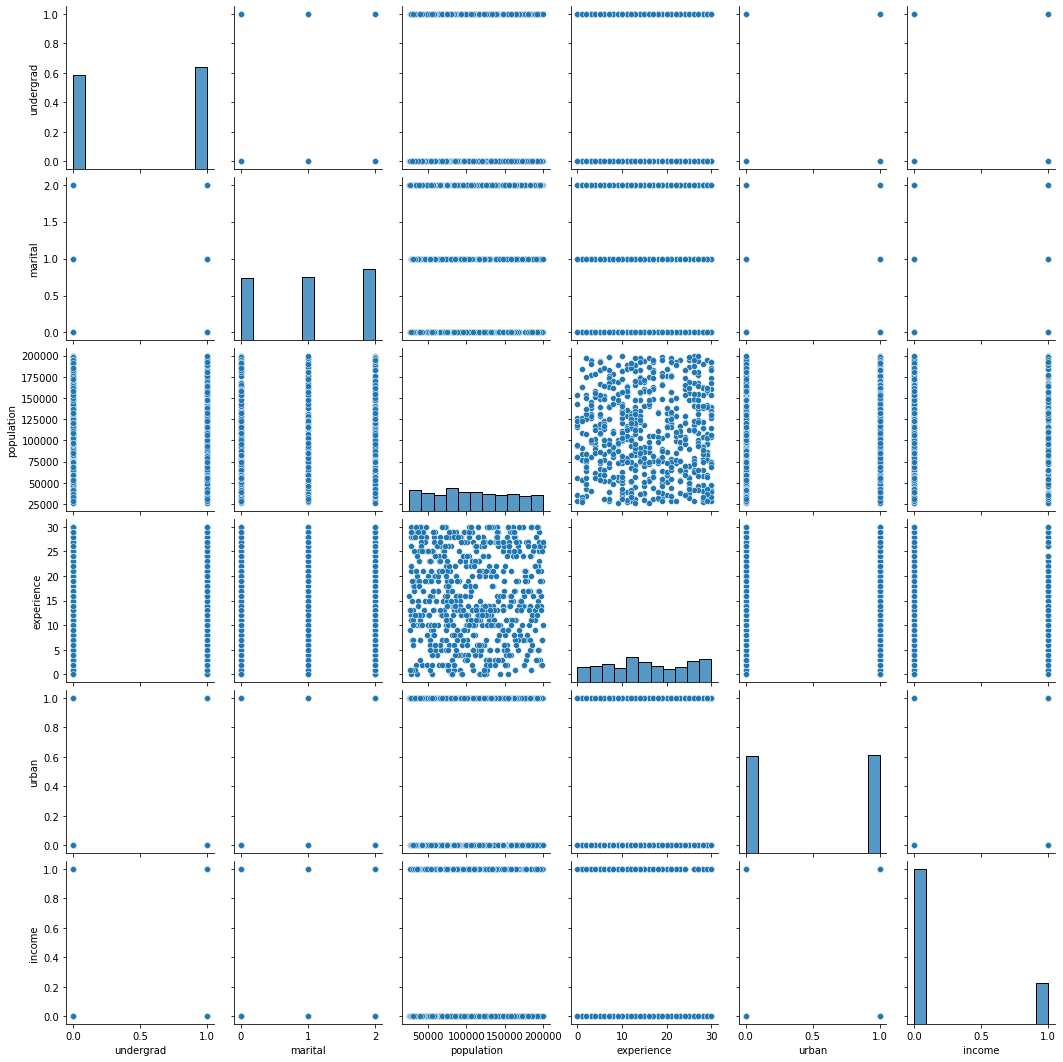

In [27]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud)

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [7]:
##Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [8]:
## Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [10]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [11]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [12]:
model.n_outputs_

1

In [13]:
model.oob_score_

0.73125

In [14]:
##Predictions on train data
prediction = model.predict(x_train)

In [15]:
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [16]:
np.mean(prediction == y_train)

0.9916666666666667

In [17]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [18]:
##Prediction on test data
pred_test = model.predict(x_test)

In [19]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.7666666666666667

In [20]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
import six
from six import StringIO
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

In [21]:
tree = model.estimators_[5]

In [22]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [23]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [24]:
## Creating pdf and png file the selected decision tree
graph.write_pdf('fraudrf.pdf')
graph.write_png('fraudrf.png')

True